## Libraries needed for the project:

In [1]:
import matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the data:

I didn't find all of the files necessary, as most of the csv files are merged into a single file called "dailyActivity_merged" for both time periods.
Let's load the dailyActivity_merged for the March-April and April-May periods.

In [2]:
df_dailyActivity_march_april = pd.read_csv("data_march_april/dailyActivity_merged.csv")
df_dailyActivity_april_may = pd.read_csv("data_april_may/dailyActivity_merged.csv")

## Let's have a quick look at the dataframes we loaded:

In [3]:
df_dailyActivity_march_april.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [4]:
df_dailyActivity_march_april.shape

(457, 15)

In [5]:
df_dailyActivity_april_may.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
df_dailyActivity_april_may.shape

(940, 15)

## Looks alright so far. Now let's see if there are any NaN values:

In [7]:
df_dailyActivity_march_april.isnull().sum(axis = 0)

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [8]:
df_dailyActivity_april_may.isnull().sum(axis = 0)

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

## Good! Now let's check the datatypes in the dataframes to see if they match.

In [9]:
df_dailyActivity_march_april.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [10]:
df_dailyActivity_april_may.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

## Good, the datatypes match and we can now merge these to dataframes into a single one spanning a two month timeperiod.

In [11]:
df_dailyActivity_march_april['ActivityDate'] = pd.to_datetime(df_dailyActivity_march_april['ActivityDate'], format='%m/%d/%Y')
df_dailyActivity_april_may['ActivityDate'] = pd.to_datetime(df_dailyActivity_april_may['ActivityDate'], format='%m/%d/%Y')

# Concatenate the two dataframes
df_dailyActivity_merged = pd.concat([df_dailyActivity_march_april, df_dailyActivity_april_may])

# Sort the combined dataframe by 'Id' and 'ActivityDate'
df_dailyActivity_merged.sort_values(by=['Id', 'ActivityDate'], inplace=True)

# Reset index after sorting
df_dailyActivity_merged.reset_index(drop=True, inplace=True)

df_dailyActivity_merged.shape

(1397, 15)

In [12]:
unique_users_count = df_dailyActivity_merged['Id'].nunique()

# Display the number of unique users
print(f"Number of unique users in the dataset: {unique_users_count}")

Number of unique users in the dataset: 35


## The number of rows seems to match the sum of our two separate dataframes. 

In [13]:
df_dailyActivity_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [14]:
df_dailyActivity_merged.isnull().sum(axis = 0)

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [15]:
df_dailyActivity_merged.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,1.397000e+03,1397,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,4.781210e+09,2016-04-19 01:26:35.132426496,7280.898354,5.219434,5.192219,0.131481,1.397416,0.538461,3.193407,0.001704,19.679313,13.403006,185.372942,992.542591,2266.265569
min,1.503960e+09,2016-03-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-09 00:00:00,3146.000000,2.170000,2.160000,0.000000,0.000000,0.000000,1.610000,0.000000,0.000000,0.000000,111.000000,729.000000,1799.000000
50%,4.445115e+09,2016-04-19 00:00:00,6999.000000,4.950000,4.950000,0.000000,0.100000,0.200000,3.240000,0.000000,2.000000,6.000000,195.000000,1057.000000,2114.000000
75%,6.962181e+09,2016-04-30 00:00:00,10544.000000,7.500000,7.480000,0.000000,1.830000,0.770000,4.690000,0.000000,30.000000,18.000000,262.000000,1244.000000,2770.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,6.727057,21.920000,6.480000,12.510000,0.110000,210.000000,660.000000,720.000000,1440.000000,4900.000000
std,2.384293e+09,NaN,5214.336113,3.994206,3.980077,0.703683,2.607480,0.867436,2.116869,0.007736,31.675878,26.401247,114.058601,313.297376,753.005527


In [16]:
df_dailyActivity_merged.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

## Now let's do some analysis on the merged dataframe.
First I'll find out the average daily steps taken by the test group per day.

7280.898353614889


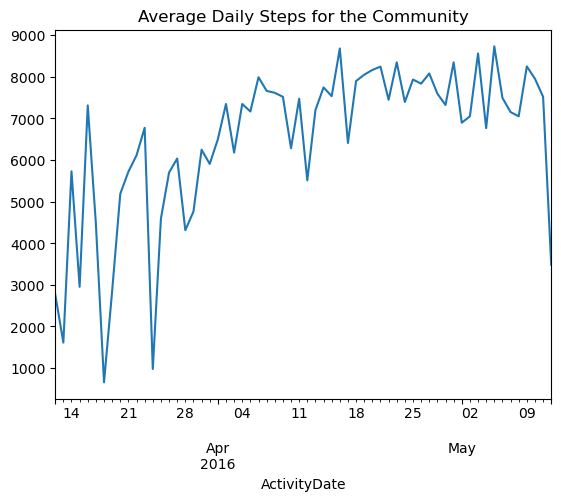

In [17]:
avg_daily_steps = df_dailyActivity_merged.groupby('ActivityDate')['TotalSteps'].mean()
avg_daily_steps.plot(kind='line', title='Average Daily Steps for the Community')
print(df_dailyActivity_merged['TotalSteps'].mean())

## Results:
We see that the average amount of steps for the test group seems to fluctuate a lot in the beginning of the two month period. This could give some insight into the regular lives of the individuals in this test group before they started using an activity tracker. This study might be the first time wearing an activity tracker for them, which could explain the fluctuation, as they are just trying it out without actually adapting to a healthier lifestyle yet. As time goes on, we can see that the trend is increasing. This could be due to the test group adapting to a healthier lifestyle after having started to use an activity tracker. This could also simply be due to the weather getting better for outdoor activities such as walking, as we move from spring towards summer. The World Health Organisation recommends taking 10000 steps daily, which we can see doesn't happen on any day during the study on a group level. This means that on average our test group did not meet the WHO recommendations, but the increasing trend can be seen as a positive. 

## Now let's see if there's any fluctuation in the daily steps during the week.

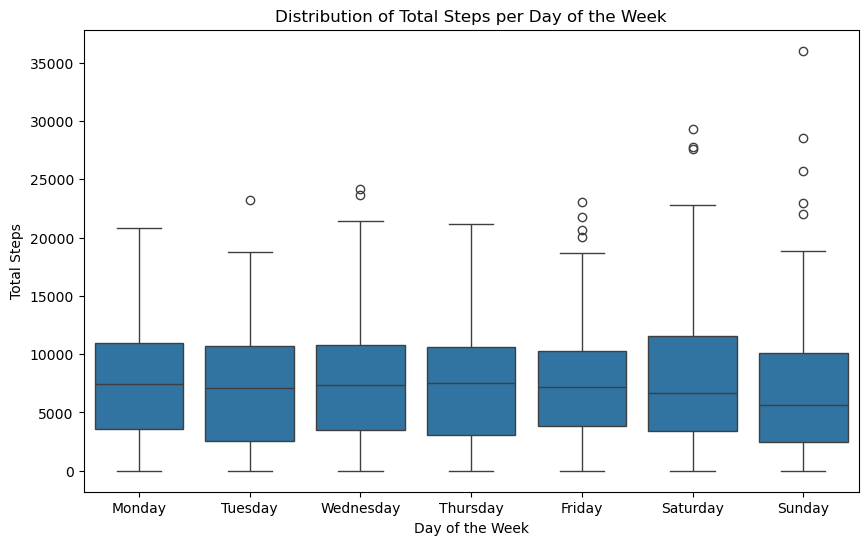

In [18]:
df_dailyActivity_merged['DayOfWeek'] = df_dailyActivity_merged['ActivityDate'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='TotalSteps', data=df_dailyActivity_merged, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Total Steps per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.show()

## Results:
From this boxplot we can see that on a group level, the distribution of steps taken on any given day of the week stays around the same. The median also stays almost consistant at around the 6000 - 7000 steps per day range. Saturday seems to be the most active, which could be explained by it usually being a day off for most people. This would leave more time for sports activities, like outdoor hikes etc. There are also quite a few outliers. These outliers could represent especially active people in the test group, who tend to go on long walks mostly during the weekends. Considering the WHO recommendation of 10000 steps per day, we can see that even the third quartile just about reaches the recommended 10000 steps on any given day of the week. This means, that only a small percent of people in our test group achieves 10000 steps per day, which is in line with our analysis of the average daily steps per day on a group level during the study period. 

## Next I'd like to analyze the correlation between the features in our merged dataset. I'll do this by calculating the Pearson correlation and plotting a heatmap.

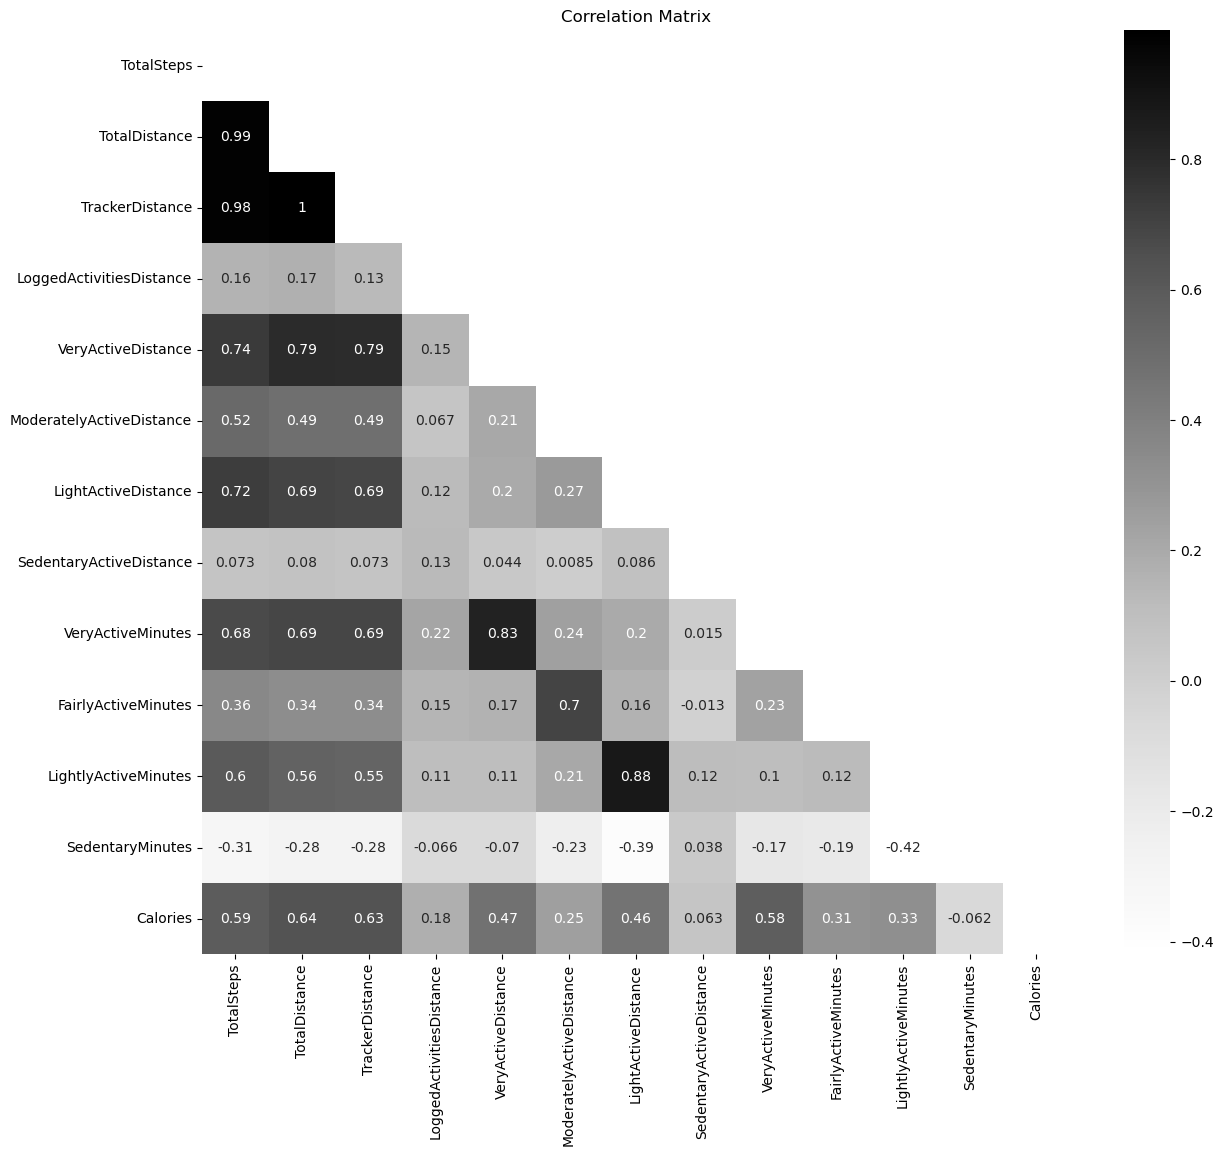

In [19]:
correlation_matrix = df_dailyActivity_merged.iloc[:, 2:-1].corr()

fig = plt.figure(figsize=(14, 12))

ax = fig.gca()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, cmap = "Greys", annot = True, xticklabels = df_dailyActivity_merged.columns[2:-1], yticklabels = df_dailyActivity_merged.columns[2:-1], mask=mask)
plt.title("Correlation Matrix")
title_text = plt.gca().title.get_text()

plt.show()

## Results:
We can see that there are some clear positive correlations between our variables. If we focus on the 'Calories' variable, we can see that it has a strong positive correlation (> 0.50) with 'TotalSteps', 'TotalDistance', 'TrackerDistance', and 'VeryActiveMinutes'. It also has a moderate correlation with 'VeryActiveDistance', 'LightActiveDistance', 'FairlyActiveMinutes' and 'LightlyActiveMinutes'. This would indicate that larger 'very active minutes' spent and the more distance an individual covers, the more calories they will burn, which is quite obvious. 

## Now let's analyze the data on a subject level.
For this I chose to analyze the average steps of the first user in our dataframe. I'll find out if there's any interesting patterns in their behaviour.

11935.78


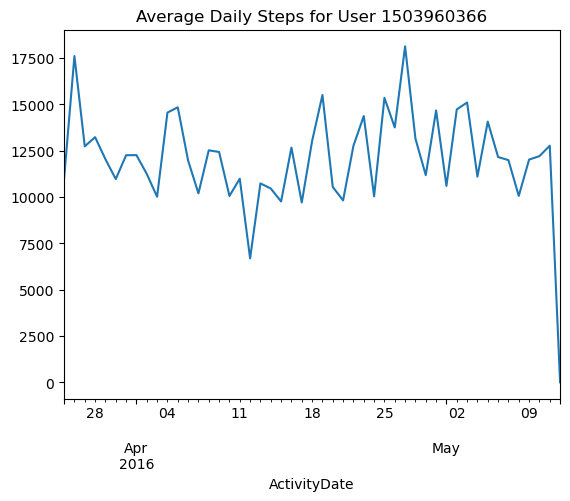

In [20]:
user_id = df_dailyActivity_merged['Id'].iloc[0]
user_data = df_dailyActivity_merged[df_dailyActivity_merged['Id'] == user_id].copy()
avg_daily_steps_individual = user_data.groupby('ActivityDate')['TotalSteps'].mean()
avg_daily_steps_individual.plot(kind='line', title=f'Average Daily Steps for User {user_id}')
print(user_data['TotalSteps'].mean())

## Results:
As we compare the individual data to the data of the whole test group, we can see that the individual we have chosen is quite a lot more active than the group on average. Their graph stays above the WHO recommended 10000 steps per day for almost the whole study period of two months. There seems to be however quite a lot of fluctuation on some days, with them reaching over 17500 steps on two occasion. Considering how much this individual walks on average, we can argue that there might be some very low activity individuals in our test group as our group average is significantly lower. This individual might also be an outlier in our data. Let's see if the group average plot changes if we ignore this individual.

7108.111358574611


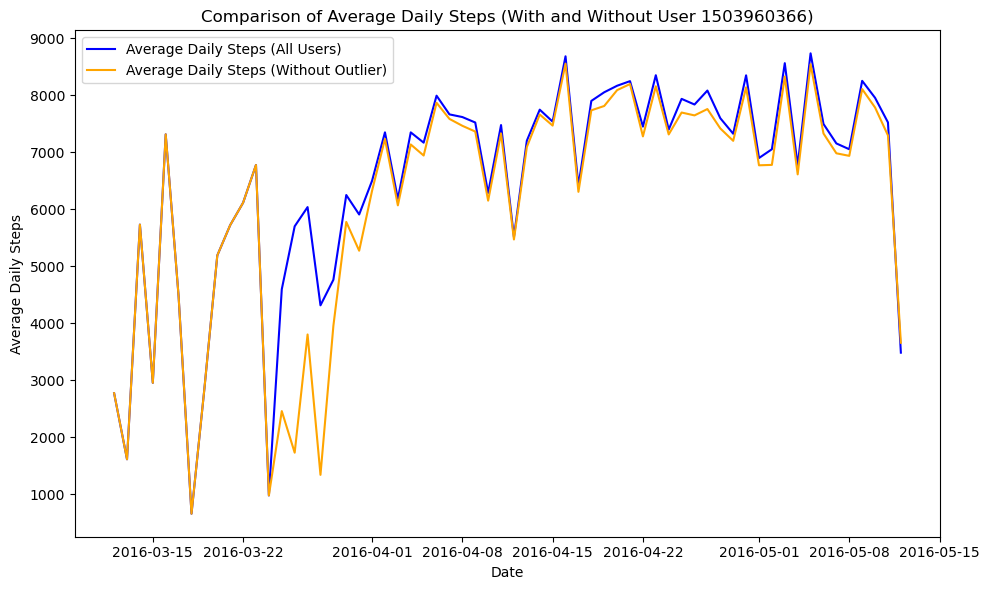

In [21]:
no_outlier_data = df_dailyActivity_merged[df_dailyActivity_merged['Id'] != user_id]
avg_daily_steps_2 = no_outlier_data.groupby('ActivityDate')['TotalSteps'].mean()
print(no_outlier_data['TotalSteps'].mean())

plt.figure(figsize=(10, 6))

plt.plot(avg_daily_steps.index, avg_daily_steps, label='Average Daily Steps (All Users)', color='blue')

plt.plot(avg_daily_steps_2.index, avg_daily_steps_2, label='Average Daily Steps (Without Outlier)', color='orange')

plt.title(f'Comparison of Average Daily Steps (With and Without User {user_id})')
plt.xlabel('Date')
plt.ylabel('Average Daily Steps')
plt.legend() 

plt.tight_layout()
plt.show()

## Results
As we can see, the plot doesn't change much if we look at the whole picture. There is a small decrease in the average if we exclude the individual we chose, but the difference isn't significant enough so that we could call them an outlier in the data. 

## Next I'd like to analyze the correlation between 'Calories' and 'VeryActiveMinutes' of our chosen individual.

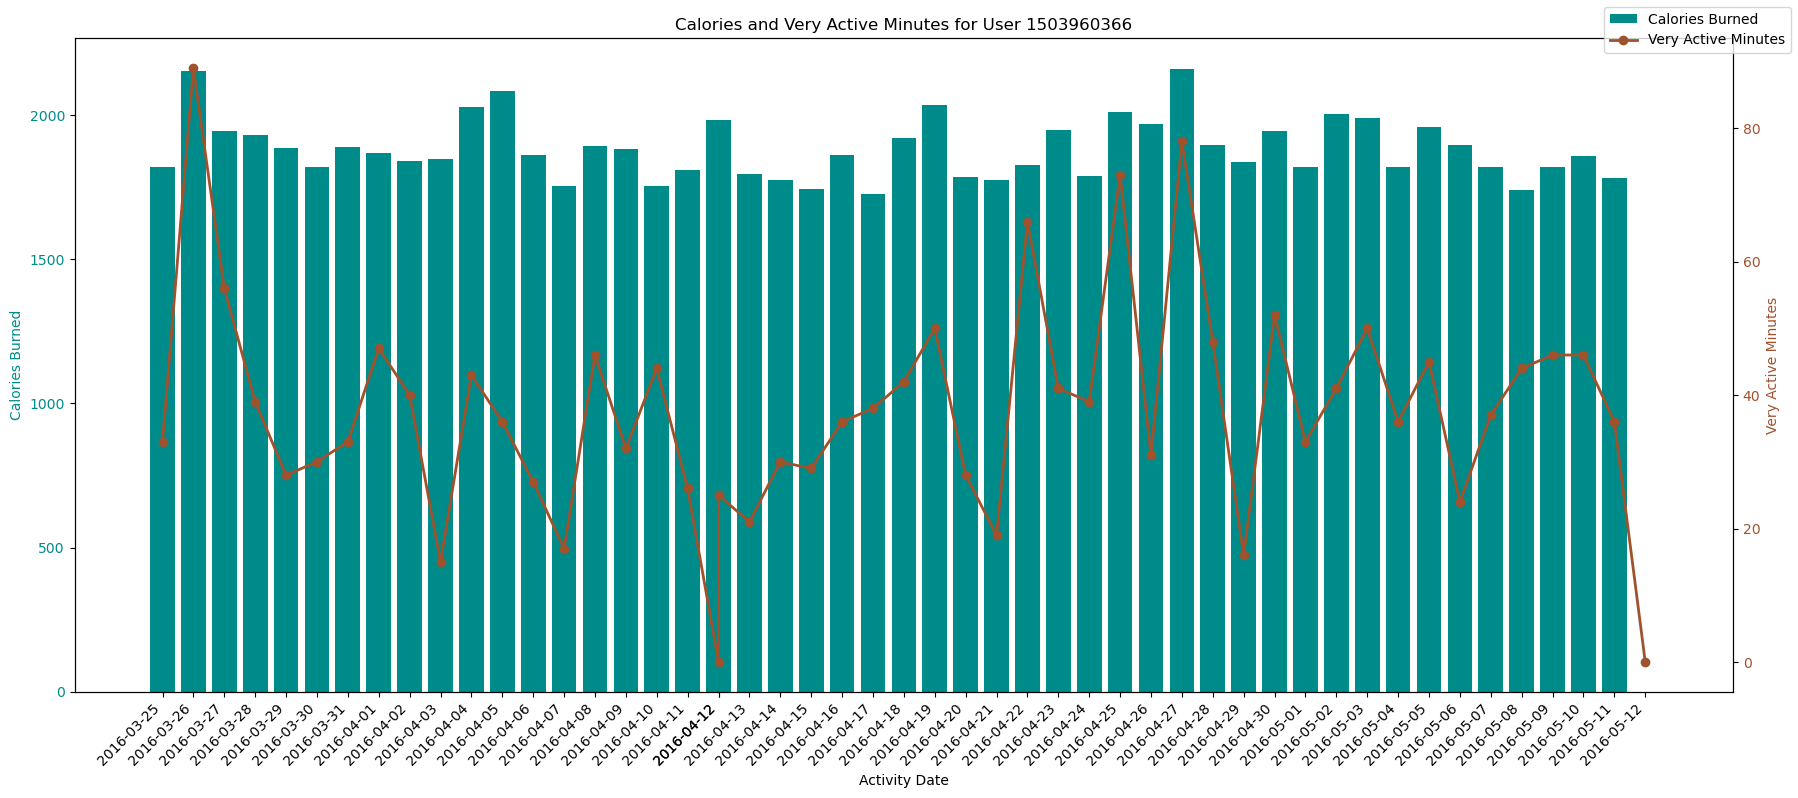

In [22]:
user_data = user_data.sort_values(by='ActivityDate')

fig, ax1 = plt.subplots(figsize=(18, 8))

ax1.bar(user_data['ActivityDate'], user_data['Calories'], color='darkcyan', label='Calories Burned')

ax1.set_xlabel('Activity Date')
ax1.set_ylabel('Calories Burned', color='darkcyan')
ax1.tick_params(axis='y', labelcolor='darkcyan')

ax1.set_xticks(user_data['ActivityDate'])
ax1.set_xticklabels(user_data['ActivityDate'].dt.strftime('%Y-%m-%d'), rotation=45, ha='right', fontsize=10)

ax2 = ax1.twinx()

ax2.plot(user_data['ActivityDate'], user_data['VeryActiveMinutes'], color='sienna', marker='o', linestyle='-', linewidth=2, label='Very Active Minutes')

ax2.set_ylabel('Very Active Minutes', color='sienna')
ax2.tick_params(axis='y', labelcolor='sienna')

plt.title(f'Calories and Very Active Minutes for User {user_id}')

fig.legend()

plt.tight_layout()

plt.show()


## Results:
As we can see there doesn't seem to be very high correlation between the very active minutes and calories burned. Our active individual kept their calorie burnage steady without needing much "very active minutes". This could indicate, that low intensity activities like walking are just as good at burning calories as high intensity activity.

## Lastly I will perform K-Means Clustering to implement user segmentation.

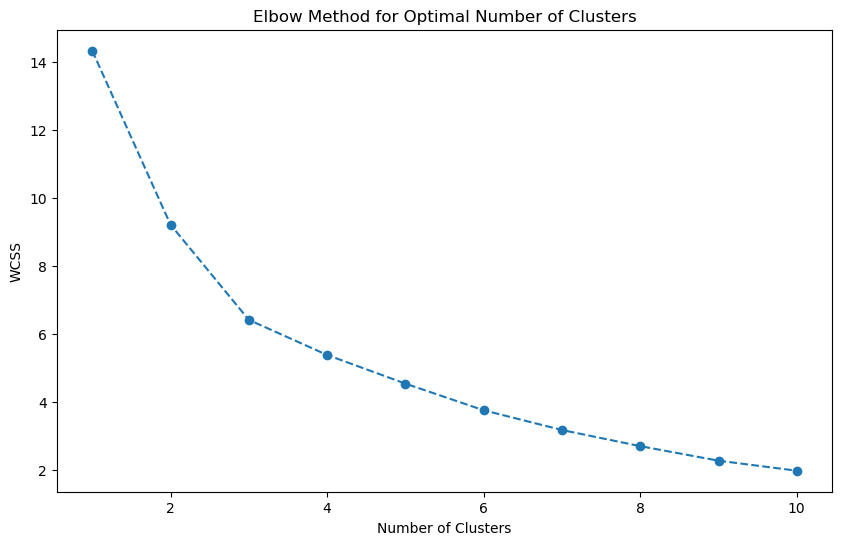

In [23]:
user_activity = df_dailyActivity_merged.groupby('Id').agg({
    'TotalSteps': 'mean',
    'Calories': 'mean',
    'VeryActiveMinutes': 'mean',
    'FairlyActiveMinutes': 'mean',
    'LightlyActiveMinutes': 'mean',
    'SedentaryMinutes': 'mean',
}).reset_index()

features = user_activity[['TotalSteps', 'Calories', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]

scaler = MinMaxScaler()

normalized_features = scaler.fit_transform(features)

wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Using the Elbow Method, I've chosen 3 as the number of clusters for this particular dataset. 

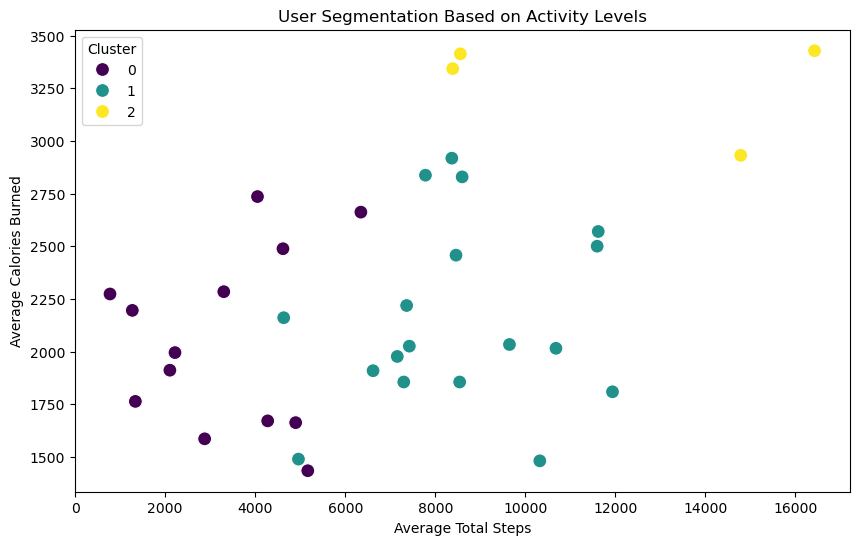

                   Id    TotalSteps     Calories  VeryActiveMinutes  \
Cluster                                                               
0        4.905636e+09   3325.512904  2050.832803           4.630088   
1        4.161680e+09   8499.570179  2163.427286          16.895063   
2        7.721720e+09  12037.484753  3279.688596          73.742900   

         FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  
Cluster                                                               
0                  12.689517            110.754878       1212.813607  
1                  16.274521            235.770247        873.102562  
2                  15.272256            174.608926        917.834485  


In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
user_activity['Cluster'] = kmeans.fit_predict(normalized_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='Calories', hue='Cluster', data=user_activity, palette='viridis', s=100)
plt.title('User Segmentation Based on Activity Levels')
plt.xlabel('Average Total Steps')
plt.ylabel('Average Calories Burned')
plt.show()


cluster_summary = user_activity.groupby('Cluster').mean()
print(cluster_summary)

Cluster
0    13
1    18
2     4
Name: count, dtype: int64


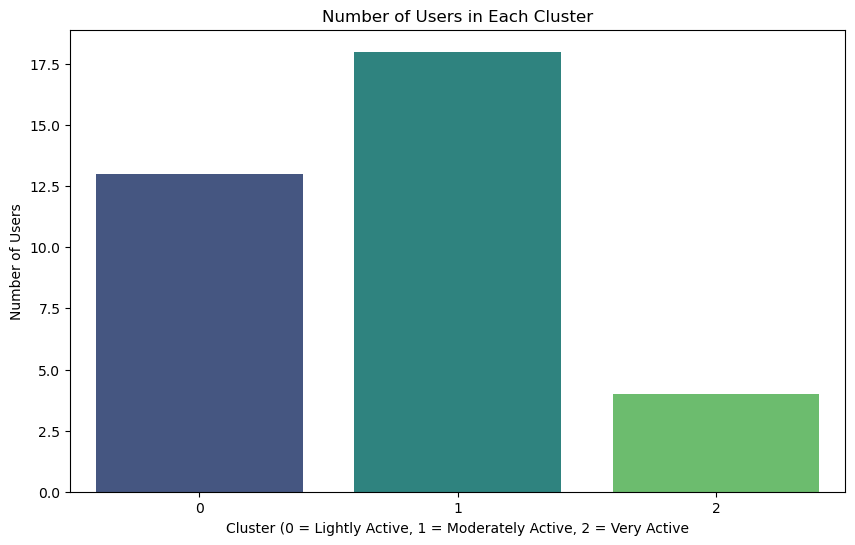

In [25]:
cluster_counts = user_activity['Cluster'].value_counts().sort_index()

print(cluster_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Users in Each Cluster')
plt.xlabel('Cluster (0 = Lightly Active, 1 = Moderately Active, 2 = Very Active')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

## Results:
After clustering and plotting the results, we can see that alarmingly only 4 people (11%) out of our test group fall in to the 'Very Active' category and 13 people (37%) fall into the 'Lightly Active'¨category. From this we can see that a significant portion of our test group doesn't follow a healthy active lifestyle. However, a large portion (52%) of our test group is at least moderately active. 